Using the Wisconsin breast cancer diagnostic dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
print(f'Libraries have been imported! :)')

df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

df.diagnosis = df.diagnosis.apply(lambda x:0 if x=='B' else 1).astype(int)
#df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

#print(df.tail())
print(f'Preview:\n\n{df.head()}')
print(' ')
print(df.describe(),'\n','\n')

In [ ]:
# simple heat map showing where we are missing data
heat_map = sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = "RdPu", vmin = 0, vmax = 1)
plt.title('Null Value Heatmap')
plt.show()

**The blank graph shows that there are no null values in the Data.**

In [ ]:
# a count plot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.countplot(data=df, x=df.diagnosis, palette='flare')
plt.show()


In [ ]:
# let's check out the spread of mean radius using a histogram\
plt.figure(figsize = (10,6))
sns.histplot(df.radius_mean,bins = 25)
plt.show()

In [ ]:
#Let’s visualize the average radius of a tumor by diagnosis via a box plot.
plt.figure(figsize = (10,6))
sns.boxplot(x=df.diagnosis,y=df.radius_mean,data=df)
plt.show()

**The Box-plot shows that those diagnosed with cancer tend to have larger radius when compared to those who don't.**

In [ ]:
# calculate the average radius size by diagnosis (0 or 1)
print(df.groupby(df.diagnosis).radius_mean.mean(),'\n','\n')
print(df.info(),'\n','\n')
#print(df.columns,'\n','\n')


#Split data into X and y
X = df.drop('diagnosis',axis=1) #[1:100]
y = df.diagnosis #[1:100]

print('X: \n',X.tail(),'\n','\n','y: \n',y.tail(),'\n','\n')

#Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

In [ ]:
#Train and predict
mod = LogisticRegression()
mod.fit(X_train,y_train)
pred = mod.predict(X_test)

correct_pred= 0 
incorrect_pred = 0
idx = 0
for i in y_test:
    if i == pred[idx]:
        correct_pred += 1
        idx +=1
    else:
        incorrect_pred += 1
        idx += 1

print('No of correct pred = ','\t',correct_pred)
print('No of incorrect pred =  ',incorrect_pred,'\n','\n')
print('Prediction score: ',mod.score(X_test,y_test),'\n','\n')

In [ ]:
print(classification_report(y_test, pred),'\n','\n')
confusion_matrix(y_test, pred)

**The Confusion Matrix shows that out of 94 predicted to not have breast cancer , 2 were falsely classified as they actually had cancer , while in case of 77 predicted to have cancer , 6 were falsely classified as they didnt have cancer.**

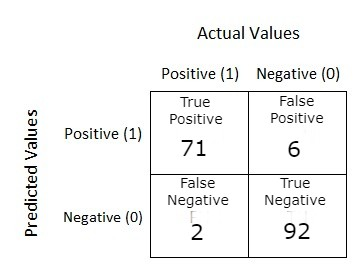